# Answer 1:
Bollinger band: 
Stocks chosen: Netflix, Facebook, Walmart

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime

C:\Users\moumi\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Let's get our data from Yahoo Finance by using a function

def get_adj_close(ticker, start, end):
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

In [6]:
# Setting up Starting & End Date

Nflx = get_adj_close('Nflx', '7/2/2020', '07/21/2020')
FB = get_adj_close('FB', '7/2/2020', '07/21/2020')
WMT = get_adj_close('WMT', '7/2/2020', '07/21/2020')

In [7]:
# Let's Calculate the 20 day MA and the standard deviations

for item in (Nflx, FB, WMT):
    item['20 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    item['20 Day STD'] = item['Adj Close'].rolling(window=20).std() 
    
    item['Upper Band'] = item['20 Day MA'] + (item['20 Day STD'] * 2)
    item['Lower Band'] = item['20 Day MA'] - (item['20 Day STD'] * 2)

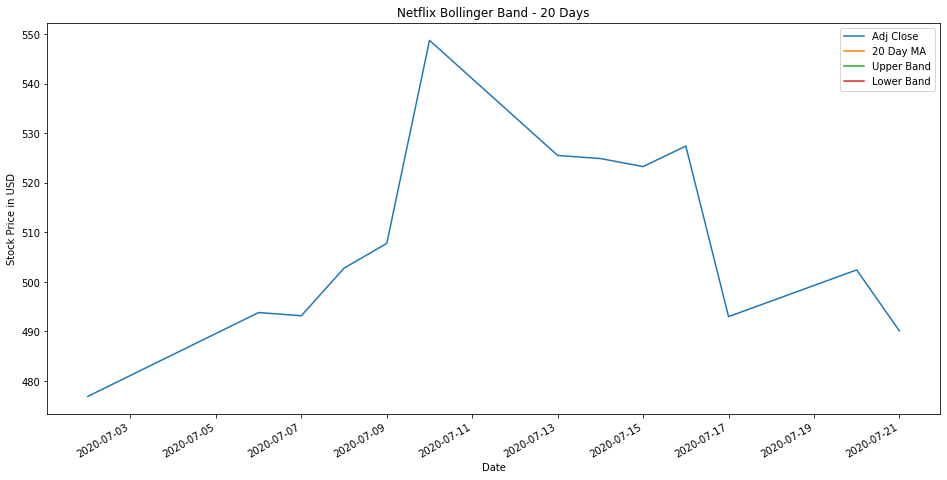

In [8]:
#Plot netflix
Nflx[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(16,8))
plt.title('Netflix Bollinger Band - 20 Days')
plt.ylabel('Stock Price in USD')
plt.show()

# Explanation:
It is a good time for the buyers as well as the sellers, since the upper band and the lower band is close to the moving average line. People who have already bought the stocks in the early 2020 can sell the stocks as the price has raised now or can keep the stocks for soem mre time as the volality in the price is less as per the graph shown above.

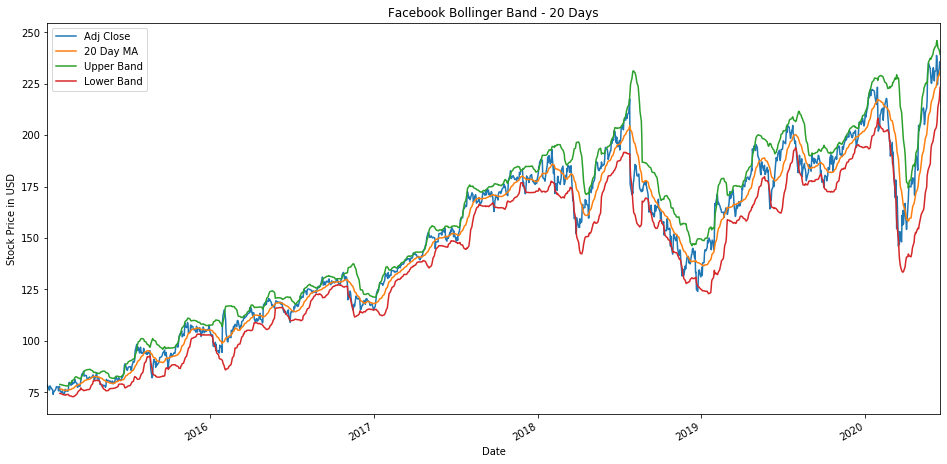

In [6]:
#plot Facebook

FB[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(16,8))
plt.title('Facebook Bollinger Band - 20 Days')
plt.ylabel('Stock Price in USD')
plt.show()

# Explanation
It is a good time for the sellers as the price is close to the upper bound level line. There was a decrease in the price recently as per the graph and people who have bought the stocks during that period can expereince a good profit. Usually it is a good dtratergy to buy the stocks when the stocks are closer to the lower band. However it is also recommended to buy the stocks when it is closer to the moving average line.

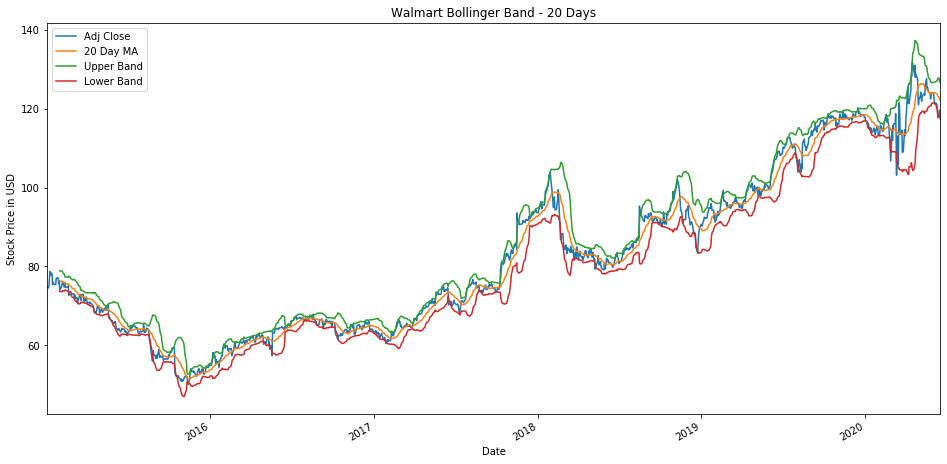

In [7]:
# Plot Walmart

WMT[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(16,8))
plt.title('Walmart Bollinger Band - 20 Days')
plt.ylabel('Stock Price in USD')
plt.show()

# Explanation:
It is a good time for the buyers as well as the sellers, since the upper band and the lower band is close to the moving average line. People can buy the stocks and keep it as the volality in the price is less as per the graph shown above.


# Answer-2
Sortino analysis: Stock returns for Netflix, Facebook and Walmart

In [10]:
startdate = datetime.datetime(2020, 7,1 )
enddate = datetime.datetime(2020, 7, 21)
Nflx=web.get_data_yahoo("Nflx",startdate, enddate,)
FB=web.get_data_yahoo("FB",startdate, enddate)
WMT=web.get_data_yahoo("WMT",startdate, enddate)
AMZN=web.get_data_yahoo("AMZN",startdate, enddate)

In [11]:
Nflx.rename(columns={'Adj Close': 'Nflx_Adj Close'}, inplace=True)
Nflx.rename(columns={'Open': 'Nflx_Open'}, inplace=True)
FB.rename(columns={'Adj Close': 'FB_Adj Close'}, inplace=True)
FB.rename(columns={'Open': 'FB_Open'}, inplace=True)
WMT.rename(columns={'Adj Close': 'WMT_Adj Close'}, inplace=True)
WMT.rename(columns={'Open': 'WMT_Open'}, inplace=True)
AMZN.rename(columns={'Adj Close': 'AMZN_Adj Close'}, inplace=True)
AMZN.rename(columns={'Open': 'AMZN_Open'}, inplace=True)

In [12]:
join1=Nflx.join(FB[['FB_Open','FB_Adj Close']])
join2=join1.join(WMT[['WMT_Open','WMT_Adj Close']])
Sortino=join2.join(AMZN[['AMZN_Open','AMZN_Adj Close']])
Sortino.drop(['High','Low','Close','Volume'],axis=1,inplace=True)
Sortino

,Nflx_Open,Nflx_Adj Close,FB_Open,FB_Adj Close,WMT_Open,WMT_Adj Close,AMZN_Open,AMZN_Adj Close
Date,,,,,,,,
2020-07-01,454.000000,485.640015,228.500000,237.550003,119.449997,119.690002,2757.989990,2878.699951
2020-07-02,485.640015,476.890015,239.000000,233.419998,120.089996,119.209999,2912.010010,2890.300049
2020-07-06,480.769989,493.809998,233.759995,240.279999,119.800003,118.889999,2934.969971,3057.040039
2020-07-07,497.309998,493.160004,239.410004,240.860001,118.449997,126.949997,3058.550049,3000.120117
2020-07-08,498.579987,502.779999,238.110001,243.580002,128.000000,124.440002,3022.610107,3081.110107
2020-07-09,508.399994,507.760010,245.000000,244.500000,125.610001,127.750000,3115.989990,3182.629883
2020-07-10,519.729980,548.729980,243.690002,245.070007,128.740005,130.679993,3191.760010,3200.000000
2020-07-13,567.979980,525.500000,247.009995,239.000000,131.330002,129.520004,3251.060059,3104.000000
2020-07-14,517.080017,524.880005,236.759995,239.729996,129.279999,132.009995,3089.000000,3084.000000


In [13]:
Sortino.to_excel("Sortino_analysis.xlsx",
             sheet_name='Stock_return',index=True)

In [ ]:
#sortino analysis perfomred in excel